-----
<div> <center> ESPACIO PARA BANNER DE LA MAESTRIA </center> </div>   

-----

# Clustering: K-medias. Fundamentos Teóricos.

Este *cuaderno* trata sobre el algoritmo de K-medias. Este algoritmo es una de las posibles herramientas para realizar clustering o agrupamiento de datos. El objetivo del *cuaderno* es que aprenda que es el algoritmo de K-medias, que sea capaz de reconocer las características y el funcionamiento de este algortimo, y como construirlo e implementarlo.

**NO** es necesario editar el archivo o hacer una entrega. Los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar  libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.

# K-Medias
El algoritmo de k-medias es un algoritmos de clustering de descenso iterativo. 



No-Math k-means Walkthrough The no-math algorithm for k-means clustering is pretty simple: 

First, we'll pick "k" centroids, where "k" would be the expected distinct number of clusters. The value of k will be chosen by us and determines the type of clustering we obtain. 

Then, we will place the "k" centroids at random places among the existing training data.

 Next, the distance from each centroid to all the points in the training data will be calculated. We will go into detail about distance functions shortly, but for now, let's just consider it as how far points are from each other. 

 Now, all the training points will be grouped with their nearest centroid. 

Isolating the grouped training points along with their respective centroid, calculate the mean data point in the group and move the previous centroid to the mean location. This process is to be repeated until convergence or until maximum iteration limit has been achieved. 

And that's it. The following image represents original raw data:




Este se usa cuando todas las variables en el conjunto de datos son numéricas y se utiliza la distancia euclidiana cuadrática para definir la disimilaridad entre observaciones:
$$d(x_i, x_{i'})=\sum_{j=1}^p(x_{ij}-x_{i'j})^2=||x_i-x_{i'}||^2$$
En este caso particular la función de pérdida a minimizar para garantizar que los puntos más cercanos entre sí estén dentro de un mismo segmento es:
$$W(C)=\frac{1}{2}\sum_{k=1}^K\sum_{C(i)=k}\sum_{C(i')=k}||x_i-x_{i'}||^2$$
$$=\sum_{k=1}^K N_k\sum_{C(i)=k}||x_i-\bar{x_{k}}||^2$$
En donde $\bar{x_{k}}=(\bar{x_{1k}}, \cdots, \bar{x_{pk}})$ es el vector de medias asociado al clúster k-ésimo y $N_k=\sum_{i=1}^N(C(i)=k)$.
Por tal motivo, el criterio se minimiza asignando las $N$ observaciones a los $K$ conglomerados de tal manera que dentro de cada conglomerado se minimiza la disimilitud promedio de las observaciones a la media del conglomerado, según lo definido por los puntos en ese conglomerado.
El algoritmo de descenso iterativo para resolver:
$$C^*=\min_C\sum_{k=1}^K N_k \sum_{C(i)=k} ||x_i-\bar{x_k}||^2$$
Puede ser obtenido entendiendo que para cualquier subconjunto de observaciones $S$:

$$
    \bar{x_s}=\argmin_m \sum_{i\in S} ||x_i - m||^2
$$ 

Por tanto, podemos obtener $C^∗$ resolviendo el problema de optimización ampliado:
$$ \min_{C, \{m_k\}_1^K} \sum_{k=1}^K N_k \sum_{C(i)=k} ||x_i-\bar{m_k}||^2 $$

Para minimizar la expresión pasada se usa el siguiente algoritmo: 
1. Para una determinada asignación de conglomerados $C$, la varianza total de los conglomerados se minimiza con respecto a $\{m_1, \cdots , m_K\}$ obteniendo las medias de los conglomerados asignados actualmente $\bar{x_s}=\argmin_m \sum_{i\in S} ||x_i - m||^2$.
2. Dado un conjunto actual de medias $\{m_1, \cdots , m_K\}$, la varianza total de los conglomerados se minimiza asignando cada observación a la media del conglomerado más cercana. Es decir,
$$C(i)=\argmin_{1\leq k \leq K} ||x_i-m_k||^2$$
3. Se repiten los pasos 1 y 2 hasta que las asignaciones no cambien.

Cada uno de los pasos 1 y 2 reduce el valor de la varianza total de los conglomerados, por lo que la convergencia está asegurada. Sin embargo, el resultado puede representar un mínimo local subóptimo. Por ende se recomienda iniciar el algoritmo con varias opciones aleatorias diferentes para las medias iniciales y elegir la solución que tenga el valor más pequeño de la función objetivo.

Para facilitar la comprensión, se hará un ejemplo de como funciona este algoritmo paso a paso. En resumen, se hará el siguiente proceso:
1. Se definirá el número de clústeres $k$ que se desean encontrar en los datos.
2. Se escogerán $k$ centroides al azar a partir del conjunto de datos.
3. Se calculará la distancia euclideana entre cada observación a cada uno de los centroides.
4. A cada observación se le asignará el clúster más cercano.
5. Se recalcularán $k$ nuevos centroides como la media de cada cluster. 
6. Se repetirá el proceso desde el paso 3 hasta que ninguna observación cambie de clúster.

Antes de comenzar con el algoritmo, vamos a generar ciertos datos aleatorios a partir de la función `make_blobs` de la librería `sklearn`.

In [1]:
from sklearn.datasets import make_blobs
# Creamos una base de 100 observaciones y 2 columnas. El mecanismo generador de los datos generará
# 5 centroides al azar y luego construirá observaciones al rededor de estos a partir de una 
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 5, random_state = 666)

A continuación presentaremos un diagrama de dispersión de las variables de nuestra base. Note que los centroides 0 y 1 están muy cerca uno del otro por lo que los puntos generados al rededor de estos se entremezclan entre sí.

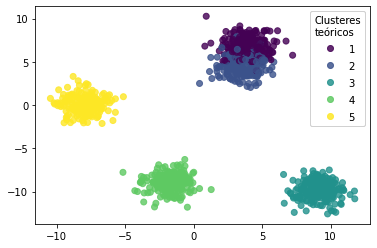

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g = plt.scatter(X[:,0], X[:,1], c = y + 1, alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres\nteóricos")
ax.add_artist(legend)
plt.show()

El primer paso para realizar la segmentación por K-medias es definir $K$. ¿Cuántos segmentos deseamos encontrar en nuestros datos? Lo ideal es evaluar un rango de posibilidades y luego escoger el $K$ que maximice algún criterio de calidad de clusteres (como el negativo de la varianza intracluster). Por ahora, veamos qué sucede si escogemos $K=4$.

Una vez que escogimos que $K=4$ para nuestro ejemplo, el paso a seguir es escoger 4 centroides al azar a partir del conjunto de datos.

In [3]:
import numpy as np
import random as rd

K = 4 # Número de clústeres a encontrar
n_observaciones = X.shape[0] # Número de observaciones
n_variables = X.shape[1] # Número de columnas en la base
# Definimos un array vacío para alojar los centroides
centroides = np.array([]).reshape(n_variables, 0) 
rd.seed(666) # Semilla para garantizar la replicabilidad de los resultados
for k in range(K):
    # Se escoge aleatoriamente una observación
    indice = rd.randint(0, n_observaciones - 1)
    centroides = np.c_[centroides, X[indice]]

Ahora que tenemos los centroides definidos, vamos a calcular la distancia de las observaciones a cada uno de estos puntos y luego a asignarle a cada observación el clúster más cercano.

In [4]:
distancias = np.array([]).reshape(n_observaciones, 0)
for k in range(K):
    distancia = np.sum((X - centroides[:,k])**2, axis = 1) # Formula distancia euclideana
    distancias = np.c_[distancias, distancia]
clusteres = np.argmin(distancias, axis = 1) + 1

Veamos gráficamente como va la cosa.

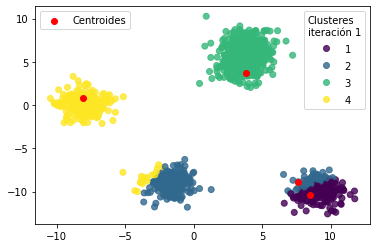

In [5]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots()

g = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres\niteración 1")
ax.add_artist(legend)

g_centroides = plt.scatter(centroides[0,:], centroides[1,:], color = "red", label = "Centroides")
plt.legend([g_centroides], ["Centroides"], loc = "upper left")

plt.show()

Ahora vamos a re-calcular los nuevos centroides de cada cluster para re asignar los clusteres. Este proceso se hará de forma iterativa hasta que ninguna observación cambie de cluster.

In [6]:
# Vamos a reorganizar nuestras observaciones
# Creamos un diccionario en donde vamos a poner cada uno de los clusteres
Y = {}
for k in range(K):
    Y[k+1] = np.array([]).reshape(2,0)
# Cada observación se asigna a su correspondiente cluster en el diccionario
for i in range(n_observaciones):
    Y[clusteres[i]] = np.c_[Y[clusteres[i]], X[i]]
# Arreglamos formato
for k in range(K):
    Y[k+1] = Y[k+1].T
# Calculamos los nuevos centroides como la media del cluster
centroides_nuevos = np.array([]).reshape(n_variables, 0) 
for k in range(K):
    centroides_nuevos = np.c_[centroides_nuevos, np.mean(Y[k+1], axis = 0)]

A continuación se muestra como cambiaron los centroides. Los clusteres siguen siendo los mismos asignados previamente. Se puede ver que algunas observaciones van a cambiar de cluster dado que están ahora más cercanas a los nuevos centroides.

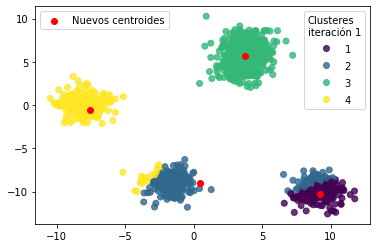

In [7]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots()

g = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres\niteración 1")
ax.add_artist(legend)

g_centroides = plt.scatter(centroides_nuevos[0,:], centroides_nuevos[1,:], color = "red", label = "Centroides")
plt.legend([g_centroides], ["Nuevos centroides"], loc = "upper left")

plt.show()

Iteración 1


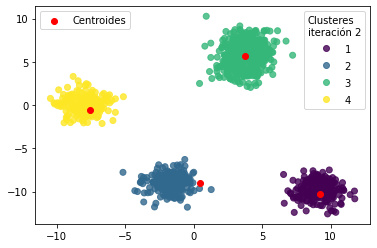

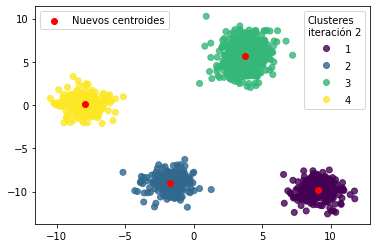

Iteración 2


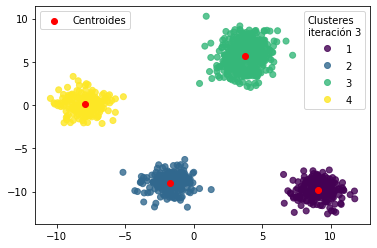

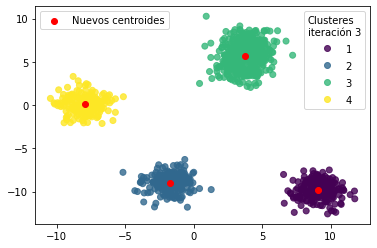

In [8]:
cambio = np.sum(centroides_nuevos - centroides) 
n = 0
while cambio != 0:
    n += 1
    print("Iteración", str(n))
    centroides = centroides_nuevos
    # Calculamos distancias y asignamos clusteres
    distancias = np.array([]).reshape(n_observaciones, 0)
    for k in range(K):
        distancia = np.sum((X - centroides[:,k])**2, axis = 1) # Formula distancia euclideana
        distancias = np.c_[distancias, distancia]
    clusteres = np.argmin(distancias, axis = 1) + 1

    # Graficamos avance
    fig, ax = plt.subplots()

    g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8, label = "Centroides")
    legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración " + str(n + 1))
    ax.add_artist(legend)

    g_centroides = plt.scatter(centroides[0,:], centroides[1,:], color = "red", label = "Centroides")
    plt.legend([g_centroides], ["Centroides"], loc = "upper left")

    plt.show()

    # Re calculamos centroides
    Y = {}
    for k in range(K):
        Y[k+1] = np.array([]).reshape(2,0)
    for i in range(n_observaciones):
        Y[clusteres[i]] = np.c_[Y[clusteres[i]], X[i]]
    for k in range(K):
        Y[k+1] = Y[k+1].T
    centroides_nuevos = np.array([]).reshape(n_variables, 0) 
    for k in range(K):
        centroides_nuevos = np.c_[centroides_nuevos, np.mean(Y[k+1], axis = 0)]

    # Graficamos avances
    fig, ax = plt.subplots()

    g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8, label = "Centroides")
    legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración " + str(n + 1))
    ax.add_artist(legend)

    g_centroides = plt.scatter(centroides_nuevos[0,:], centroides_nuevos[1,:], color = "red", label = "Centroides")
    plt.legend([g_centroides], ["Nuevos centroides"], loc = "upper left")

    plt.show()
        
    cambio = np.sum(centroides_nuevos - centroides) 

Ahora se construirá una función que corra todo el proceso mostrado anteriormente y así podamos correr el algoritmo para diferentes $K$.

In [9]:
def kmedias(X, K, max_iter = 100, visualizar_proceso = True):
    n_observaciones = X.shape[0] # Número de observaciones de la base
    n_variables = X.shape[1] # Número de columnas en la base
    # Definimos un array vacío para alojar los centroides
    centroides = np.array([]).reshape(n_variables, 0) 
    rd.seed(666) # Semilla para garantizar la replicabilidad de los resultados
    for k in range(K):
        # Se escoge aleatoriamente una observación
        indice = rd.randint(0, n_observaciones - 1)
        centroides = np.c_[centroides, X[indice]]
    n = 0
    cambio = 1
    while cambio != 0:
        n += 1
        if n >= max_iter:
            break
        print("Iteración", str(n))
        # Calculamos distancias y asignamos clusteres
        distancias = np.array([]).reshape(n_observaciones, 0)
        for k in range(K):
            distancia = np.sum((X - centroides[:,k])**2, axis = 1) # Formula distancia euclideana
            distancias = np.c_[distancias, distancia]
        clusteres = np.argmin(distancias, axis = 1) + 1

        # Graficamos avance
        if visualizar_proceso:
            fig, ax = plt.subplots()

            g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8, label = "Centroides")
            legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración " + str(n + 1))
            ax.add_artist(legend)

            g_centroides = plt.scatter(centroides[0,:], centroides[1,:], color = "red", label = "Centroides")
            plt.legend([g_centroides], ["Centroides"], loc = "upper left")

            plt.show()

        # Re calculamos centroides
        Y = {}
        for k in range(K):
            Y[k+1] = np.array([]).reshape(2,0)
        for i in range(n_observaciones):
            Y[clusteres[i]] = np.c_[Y[clusteres[i]], X[i]]
        for k in range(K):
            Y[k+1] = Y[k+1].T
        centroides_nuevos = np.array([]).reshape(n_variables, 0) 
        for k in range(K):
            centroides_nuevos = np.c_[centroides_nuevos, np.mean(Y[k+1], axis = 0)]

        # Graficamos avances
        if visualizar_proceso:
            fig, ax = plt.subplots()

            g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8, label = "Centroides")
            legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración " + str(n + 1))
            ax.add_artist(legend)

            g_centroides = plt.scatter(centroides_nuevos[0,:], centroides_nuevos[1,:], color = "red", label = "Centroides")
            plt.legend([g_centroides], ["Nuevos centroides"], loc = "upper left")

            plt.show()
            
        cambio = np.sum(centroides_nuevos - centroides) 
        centroides = centroides_nuevos
    return(clusteres)

**2 Clústeres**

![**2 Clústeres**](Imagenes/k2.gif)

Iteración 1


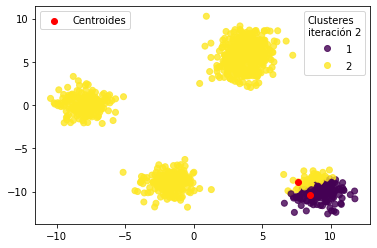

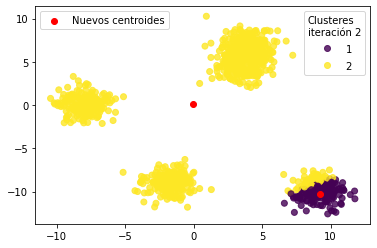

Iteración 2


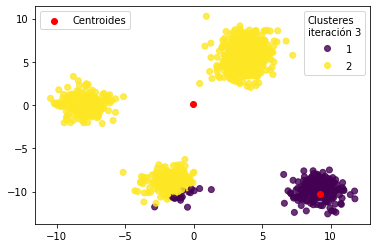

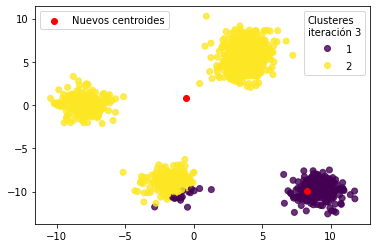

Iteración 3


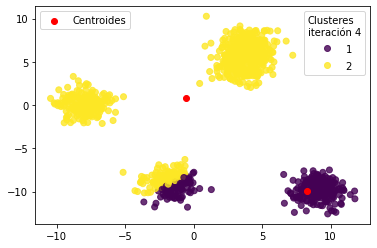

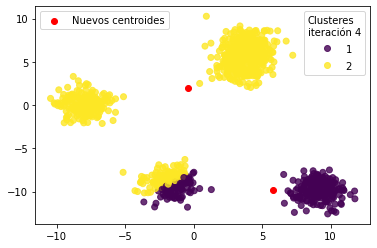

Iteración 4


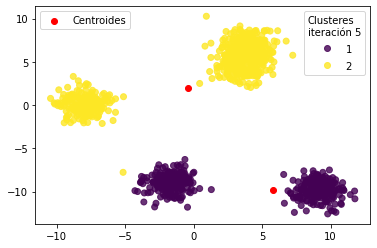

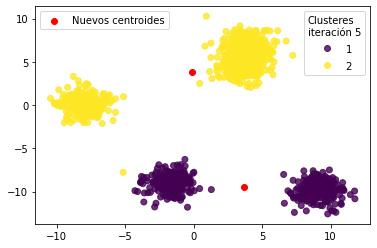

Iteración 5


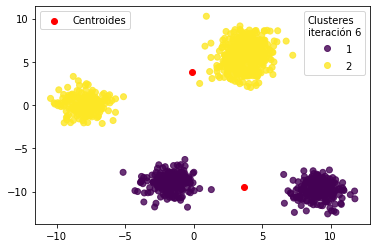

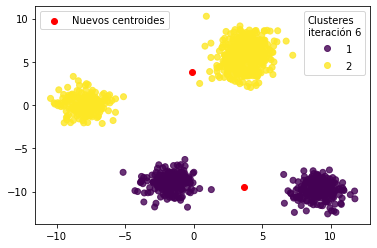

Iteración 6


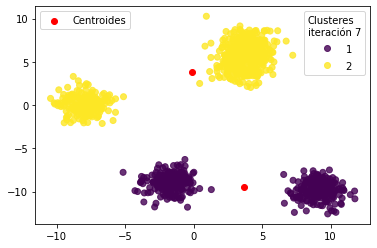

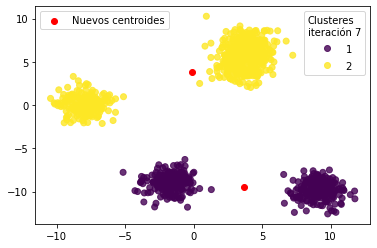

In [15]:
clusteres_2 = kmedias(X, K = 2, visualizar_proceso = True)

**3 Clústeres**

![**3 Clústeres**](Imagenes/k3.gif)

Iteración 1


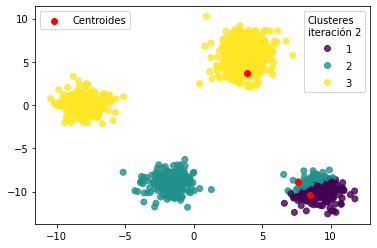

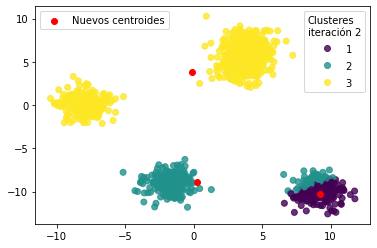

Iteración 2


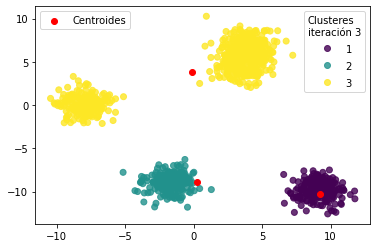

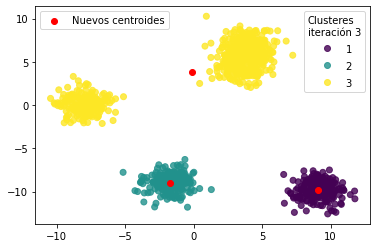

Iteración 3


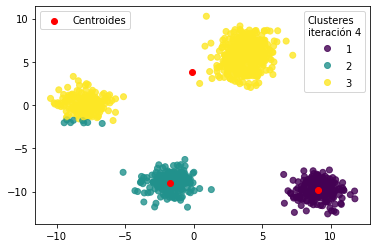

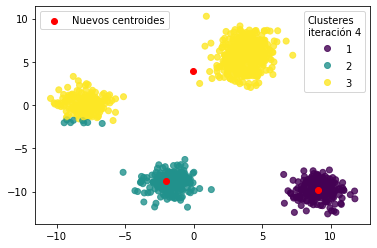

Iteración 4


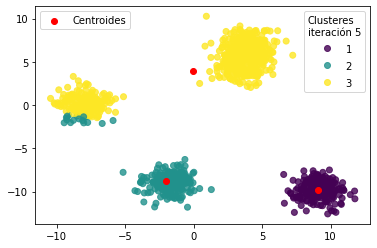

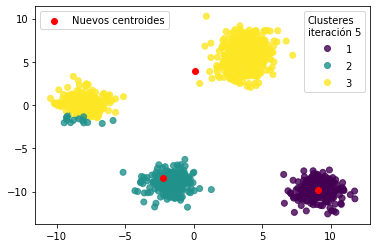

Iteración 5


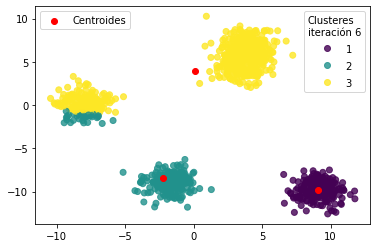

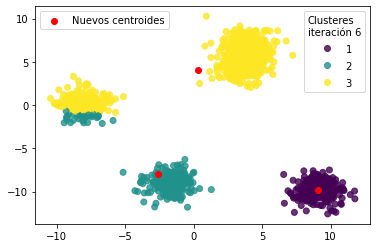

Iteración 6


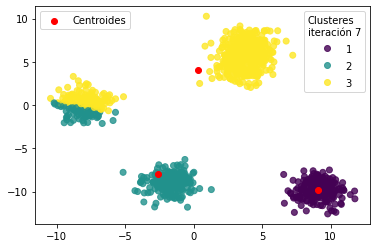

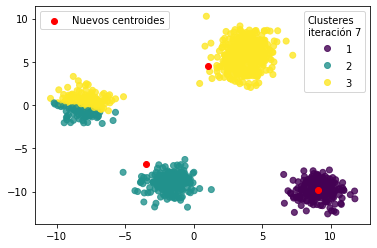

Iteración 7


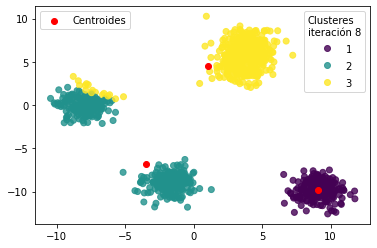

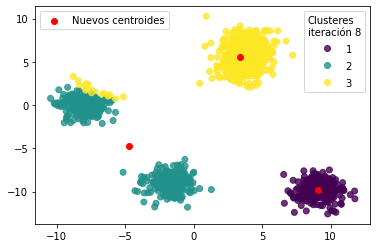

Iteración 8


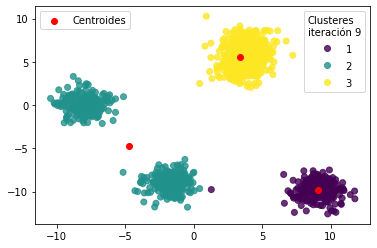

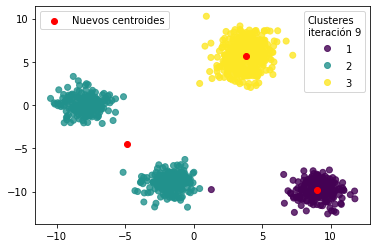

Iteración 9


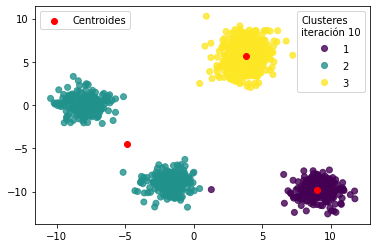

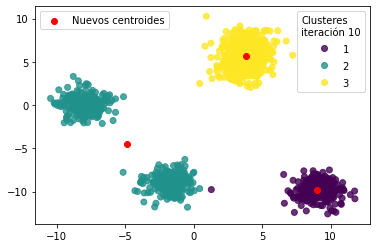

In [16]:
clusteres_3 = kmedias(X, K = 3, visualizar_proceso = True)

**4 Clústeres**

![**4 Clústeres**](Imagenes/k4.gif)

Iteración 1


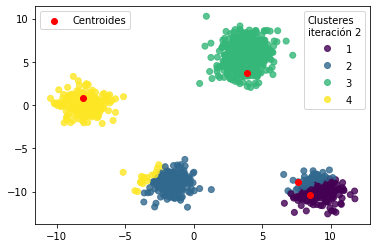

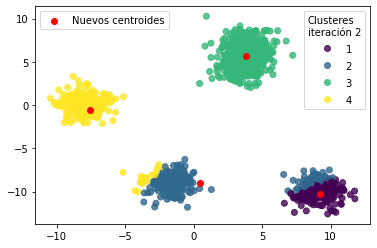

Iteración 2


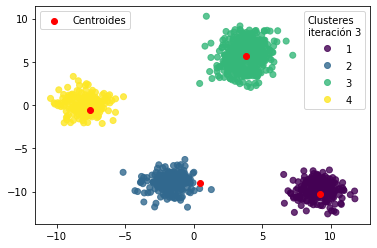

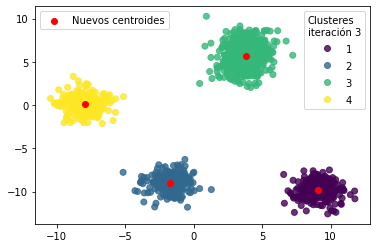

Iteración 3


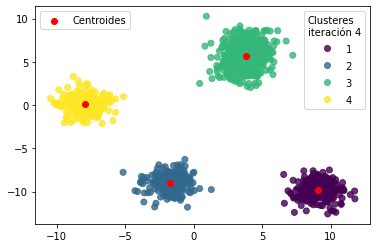

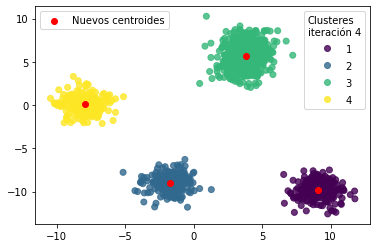

In [17]:
clusteres_4 = kmedias(X, K = 4, visualizar_proceso = True)

**5 Clústeres**

![**5 Clústeres**](Imagenes/k5.gif)

Iteración 1


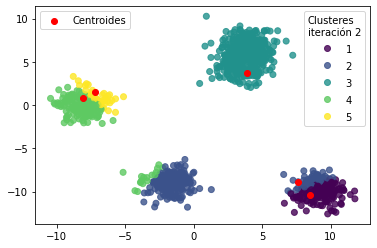

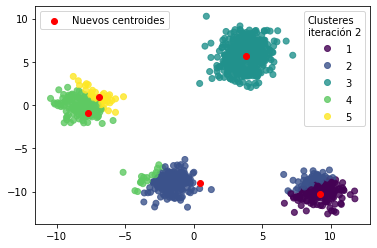

Iteración 2


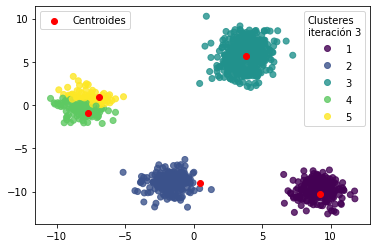

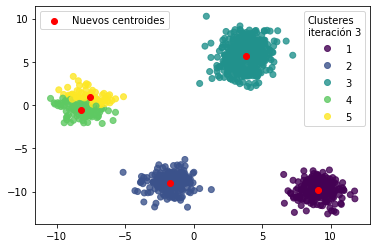

Iteración 3


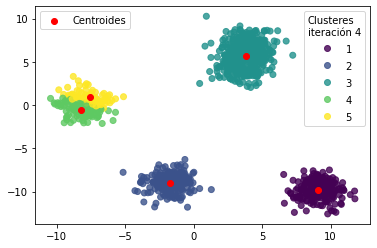

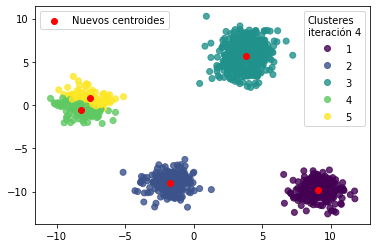

Iteración 4


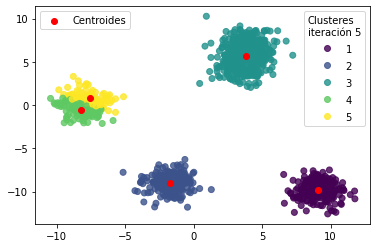

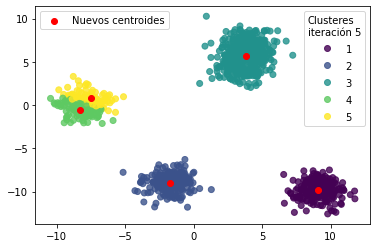

Iteración 5


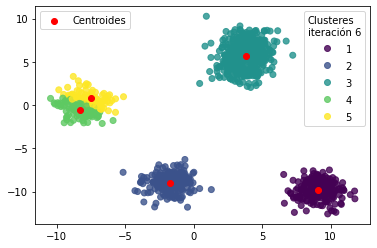

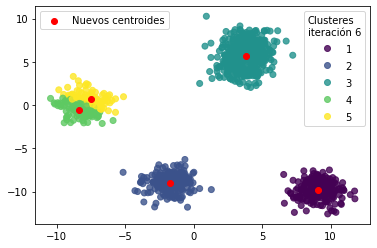

Iteración 6


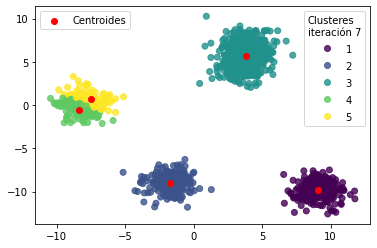

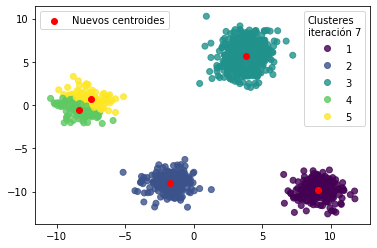

Iteración 7


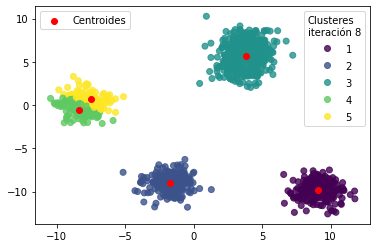

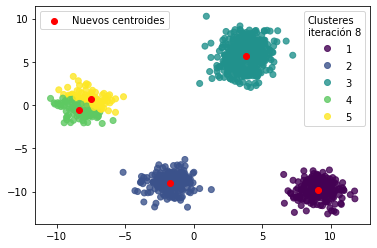

Iteración 8


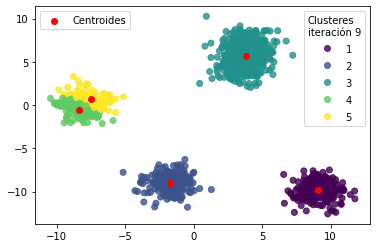

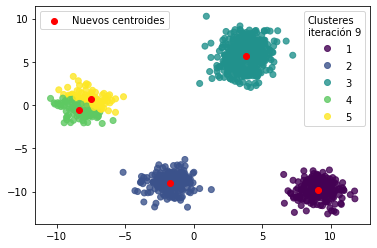

In [18]:
clusteres_5 = kmedias(X, K = 5, visualizar_proceso = True)

**6 Clústeres**

![**6 Clústeres**](Imagenes/k6.gif)

Iteración 1


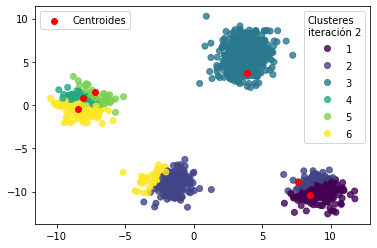

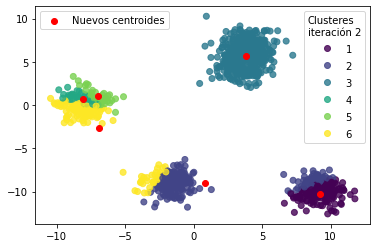

Iteración 2


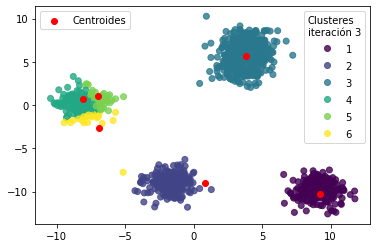

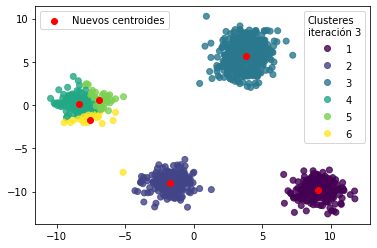

Iteración 3


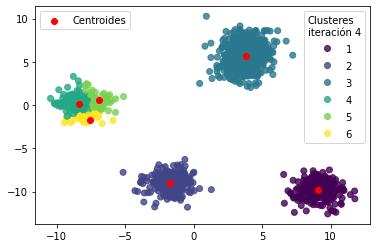

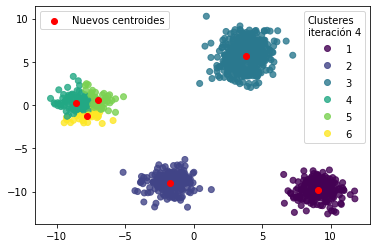

Iteración 4


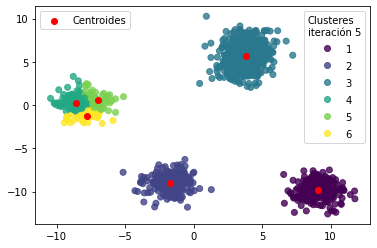

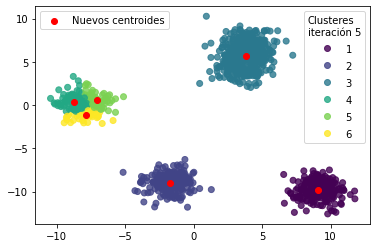

Iteración 5


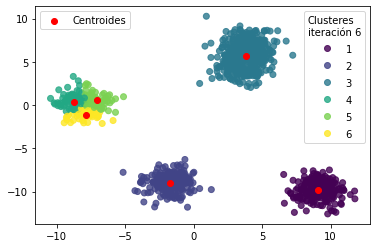

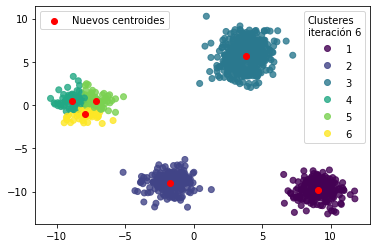

Iteración 6


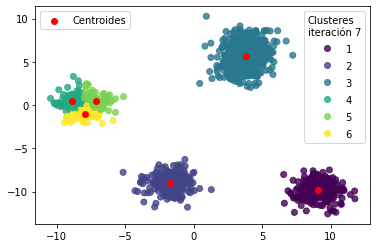

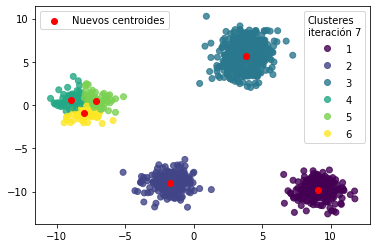

Iteración 7


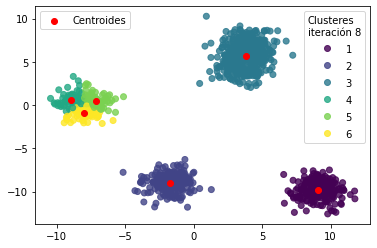

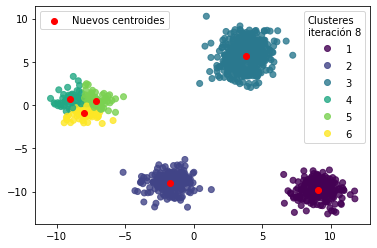

Iteración 8


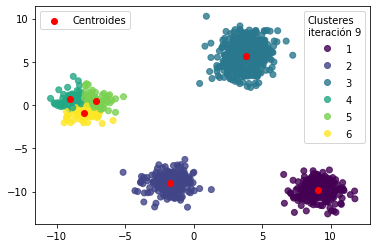

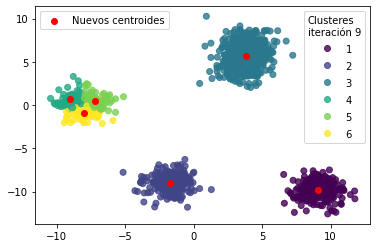

Iteración 9


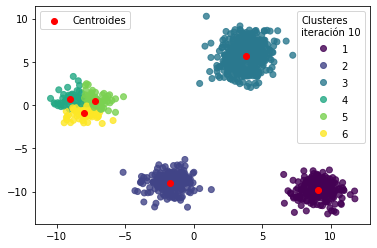

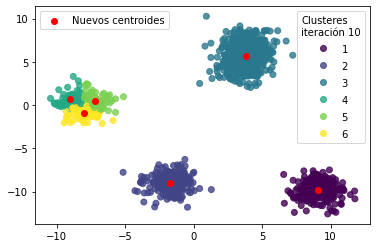

Iteración 10


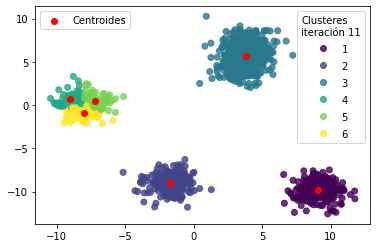

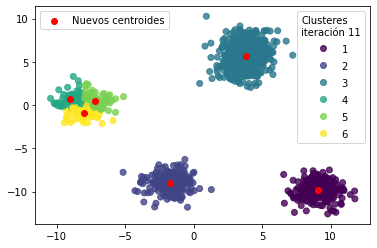

Iteración 11


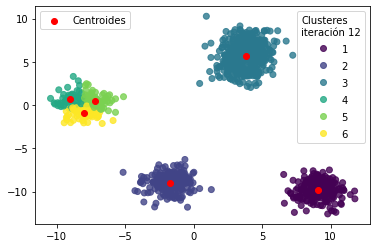

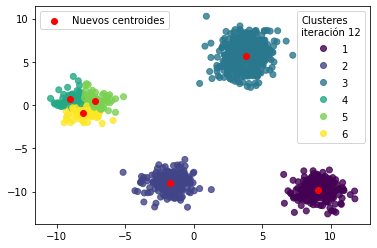

Iteración 12


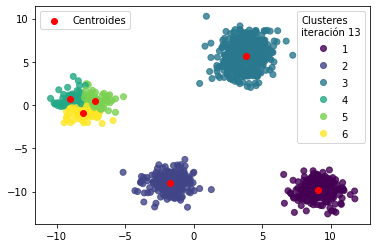

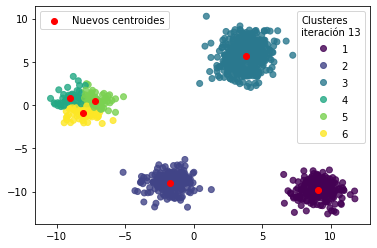

Iteración 13


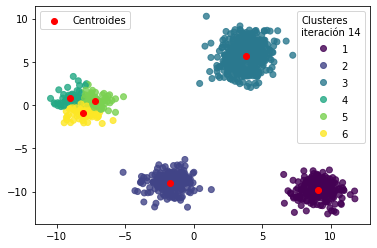

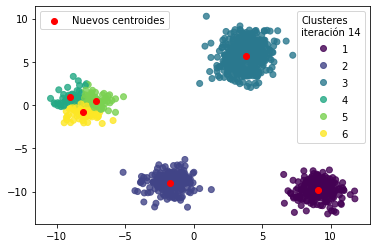

Iteración 14


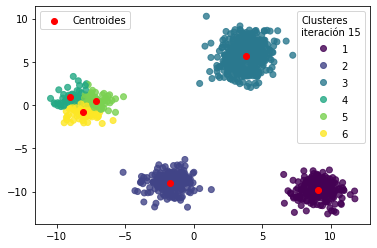

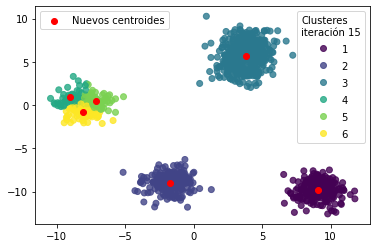

Iteración 15


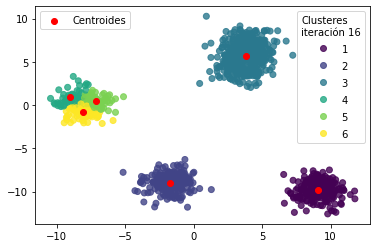

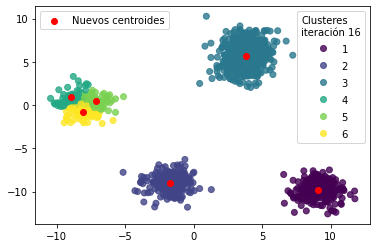

Iteración 16


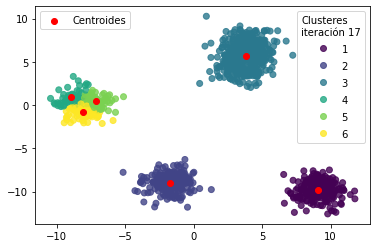

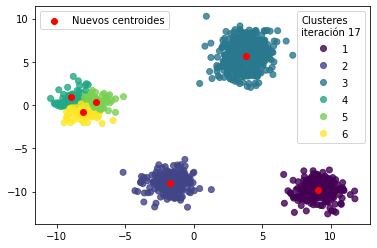

Iteración 17


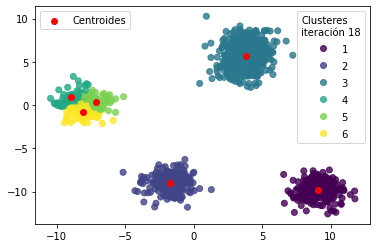

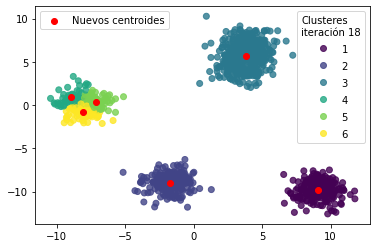

In [19]:
clusteres_6 = kmedias(X, K = 6, visualizar_proceso = True)

Se habrá podido percatar de que este algoritmo es altamente dependiente del punto de inicialización de los centroides. Por tal motivo, se recomienda siempre correr el algoritmo más de una vez con diferentes puntos de partida y escoger la solución que maximice algun criterio de calidad de la segmentación. 

Para escoger el número óptimo de segmentos $K$, usaremos la librería `sklearn` la cual tiene la función para realizar k medias de manera automática. Acá enseñeremos dos criterios para la elección del número óptimo de clusteres: La gráfica de codo y el Coeficiente de Silhouette.

### Gráfica del codo
Para este método vamos a calcular la suma de los errores al cuadrado dentro cada clúster lo cual es una medida que suma la varianza de todos los clusteres. Idealmente queremos que esta varianza sea lo más pequeña posible.

Para saber cuál es el número de segmentos $K$ óptimo vamos a calcular esta suma de las varianzas intracluster para cada $K$ y las vamos a graficar. El gráfico resultante se le conoce como "Codo" porque en la medida que aumente $K$ se va a disminuir la varianza intra clúster. Idealmente deseamos encontrar el punto para el cuál un aumento en $K$ conlleva a una reducción despreciable en la métrica de desempeño. 

La desventaja de este método para seleccionar $K$ es que no existen criterios claros para saber hasta que punto una disminución marginal en la métrica de varianza es razonable o no. Por ende, los resultados pueden cambiar de investigador en investigador.

### Coeficiente de Silhouette
Un criterio más objetivo es el coeficiente de Silhouette pues este nos indica la calidad de los clústeres a partir de un índice que va de -1 a 1 en donde números más grandes corresponde con mejores segmentaciones.

El valor de Silhouette es igual a:
$$ s(i)= \frac{b(i)-a(i)}{\max\{a(i),b(i)\}},\ \text{si } |C_{i}|>1$$
En donde, para la observación $i$ en el grupo $C_ {i}$:
$$a(i)=\frac {1}{|C_{i}|-1}\sum _{j\in C_{i},i\neq j}d(i,j)$$
$$b(i)=\min _{k\neq i}{\frac {1}{|C_{k}|}}\sum _{j\in C_{k}}d(i,j)$$

Por lo que podemos interpretar $a(i)$ como la distancia media entre $i$ y todos los demás puntos de datos en el mismo grupo, donde $|C_{i}|$ es el número de puntos que pertenecen al cluster $C_{i}$, y $d(i, j)$ es la distancia entre los puntos de datos $i$ y $j$ en el grupo $C_{i}$ (Note que el denominador es $| C_ {i} | -1$ porque no incluimos la distancia $d (i, i)$ en la suma). Podemos interpretar $a(i)$ como una medida de qué tan bien asignado está $i$ a su clúster. Entre más pequeño sea este valor, mejor será la asignación

$b(i)$ sería luego la distancia media más pequeña entre $i$ a todos los puntos en cualquier otro grupo del cual $i$ no es miembro. Esta medida nos dice que tan bien estaría asignada la observación $i$ al grupo vecino más cercano. Por ende, entre más grande sea $b(i)$, mejor será la asignación de esta observación a su propio cluster.

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

varianza_intra_cluster = []
silhouettes = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 666).fit(X)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(X, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette solo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

Bajo el método del codo podemos identificar claramente que el número óptimo de segmentos es 4. Adicionalmente, el criterio de Silhouette también coincide reportando la mejor segmentación para $K=4$

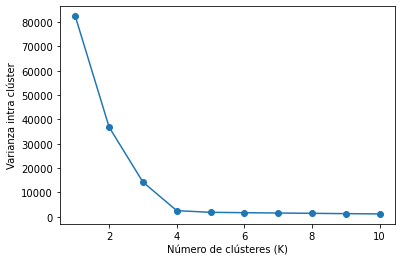

In [21]:
plt.plot(range(1, 11), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

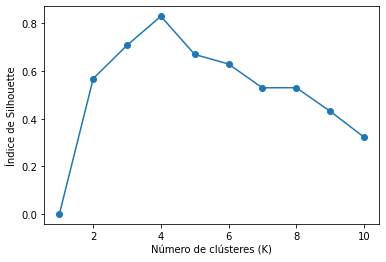

In [22]:
plt.plot(range(1, 11), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

## Referencias

- Hastie, T., Tibshirani, R., & Friedman, J. H. (2001). The elements of statistical learning: Data mining, inference, and prediction. New York: Springer.

- Kaufman, L. & Rousseeuw, P. (1990). Finding Groups in Data: An Introduction to Cluster Analysis, Wiley, New York.

- Macnaughton Smith, P., Williams, W., Dale, M. & Mockett, L. (1965). Dissimilarity analysis: a new technique of hierarchical subdivision, Nature 202: 1034–1035.

- [Scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py), Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. 